# Lesson I 

## Probability mass functions

In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

## GSS

The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues.

* Annual sample of U.S population.
* Asks about demographics and beliefs about social and political issues.
* Widely used by policy makers and researchers.

<img src='pictures/gss.jpg' />

### Read the Data

The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this:

In [4]:
# Import pandas
import pandas as pd

gss = pd.read_hdf('datasets/gss.hdf5', 'gss')

gss.head()

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### Histogram

To get started with this dataset, let's look at the distribution of ``educ``, which records the number of years of education for each respondent.

First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable:

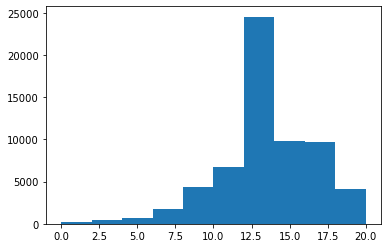

In [5]:
# Import matplotlib
import matplotlib.pyplot as plt

educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

## PMF

An alternative is a *probability mass function*, or *PMF*, that contains the unique values in the dataset and how often each one appears. 

I've provided a class called ``Pmf`` that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. 

The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF.

```python
    pmf_educ = Pmf(educ, normalized=False)
    pmf_educ.head()

    # Output:
    0.0    566
    1.0    118
    2.0    292
    3.0    686
    4.0    746
    Name: educ, dtype: float64
```

The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

You can use the bracket operator to look up a value in a ``Pmf`` and get a count.

```python
    pmf_educ[12]

    # Output:
    47689
```

This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

### Normalize

Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting ``normalize=True``; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1.

```python
    pmf_educ = Pmf(educ, normalized=True)
    pmf_educ.head()

    # Output:
    0.0    0.003663
    1.0    0.000764
    2.0    0.001890
    3.0    0.004440
    4.0    0.004828
    Name: educ, dtype: float64
```

Now if we use the bracket operator, the result is a fraction:

```python
    pmf_educ[12]
    # Output:
    0.308
```

In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

### Plot

The ``Pmf`` class provides a ``bar()`` method that plots a PMF as a bar chart. And here's what it looks like:

```python
    pmf_educ.bar(label='educ')
    plt.xlabel('Years of Education')
    plt.ylabel('PMF')
    plt.show()

    # Output:
```

<img src='pictures/pmfplot.jpg' width=400 />

In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

## Exercise

### Make a PMF

The GSS dataset has been pre-loaded for you into a DataFrame called ``gss``. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, ``'year'``, which represents the year each respondent was interviewed.

The ``Pmf`` class you saw in the video has already been created for you. You can access it outside of DataCamp via the ``empiricaldist`` library.

In [8]:
# Import PMF
from empyrical_dist import Pmf 

# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: year, Length: 62466, dtype: int64


### Plot a PMF

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable ``'age'`` contains respondents' age in years.

In [ ]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# Lesson II

## Cumulative distribution functions

In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

## From PMF to CDF

If you draw a random element from a distribution:

* PMF (Probability Mass Function) is the probability that you get exactly that value.
* CDF (Cumulative Distribution Function) is the probability that you get a value less than or equal to that value.

### Example

PMF of {1, 2, 3, 4, 5}

| PMF | CDF |
| ---- | ---- |
| PMF(1) = 1/5 | CDF(1) = 1/5 |
| PMF(2) = 2/5 | CDF(2) = 3/5 |
| PMF(3) = 1/5 | CDF(3) = 4/5 |
| PMF(5) = 1/5 | CDF(5) = 5/5 or 1 |

As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. 

The PMF says that the probability of value 1 is 1/5; 
the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. 

The CDF is the cumulative sum of the probabilities from the PMF. 

For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. 
The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

### Make a plot of a CDF

In the code for this course, I provide a ``Cdf`` class which is similar to the ``Pmf`` class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object.

In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like:

In [ ]:
from empyrical_dist import Cdf

cdf = Cdf(gss['age'])
cdf.plot()

plt.xlabel('Age')
plt.ylabel('CDF')

plt.show()

<img src='pictures/cdf.jpg' width=450 />

### Evaluating the CDF

The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability.

In [9]:
q = 51
p = cdf(q)
print(p)

53.0


In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. 
That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

### Evaluating the inverse CDF

The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. 

```python
    p = 0.25
    q = cdf.inverse(p)
    print(q)
    # Output:
    30
```

Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. 

```python
    p = 0.75
    q = cdf.inverse(p)
    print(q)
    # Output:
    57
```

By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. 

Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. 
So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

# Lesson III

## Comparing distributions

So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

## Multiple PMFs

One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents.

```python
    male = gss['sex'] == 1
    age = gss['age']
    male_age = age[male]
    female_age = age[~male]
    Pmf(male_age).plot(label='Male')
    Pmf(female_age).plot(label='Female')
    plt.xlabel('Age (years)')
    plt.ylabel('Count')
    plt.show()
```

First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each. Of course I always remember to label the axes!

<img src='pictures/agepmf.jpg' />

Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

## Multiple CDFs

We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

```python
    Cdf(male_age).plot(label='Male')
    Cdf(female_age).plot(label='Female')

    plt.xlabel('Age (years)')
    plt.ylabel('Count')
    plt.show()
```

<img src='pictures/agecdf.jpg' />

And here is the result. 

In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. 

In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.


## Income Distribution

### Income PMFs

As another example, let's look at household income and compare the distribution before and after 1995 (I chose 1995 because it's roughly the midpoint of the survey). 

```python
income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 dollars)')
plt.ylabel('PMF')
plt.show()
```

The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

<img src='pictures/incomepdf.jpg' />

Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. 

The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

### Income CDFs

Here's the code to generate the CDFs.

```python
    Cdf(income[pre95]).plot(label='Before 1995')
    Cdf(income[~pre95]).plot(label='After 1995')
```

<img src='pictures/incomecdf.jpg' />

And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. 

In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

In general, I recommend CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two.

# Lesson IV

## Modelling Distributions

In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

## The normal Distribution

Let's start with the normal distribution, also called the **Gaussian distribution**. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. 

To get a sense of what the normal distribution looks like, I'll use the *NumPy random* module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

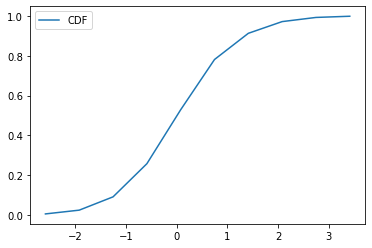

In [11]:
import numpy as np

sample = np.random.normal(size=1000)
count, bins_count = np.histogram(sample, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label='CDF')
plt.legend()
plt.show()

## the Normal CDF

*SciPy* provides an object called *norm* that represents the normal distribution. I'll use ``np.linspace()`` to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. 

``.cdf()`` evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

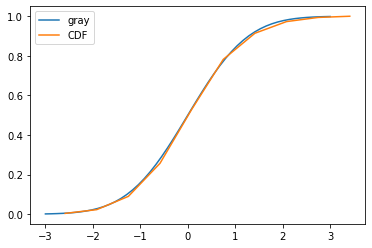

In [14]:
from scipy.stats import norm

xs = np.linspace(-3, 3)
ys = norm(0,1).cdf(xs)

plt.plot(xs, ys, label='gray')
plt.plot(bins_count[1:], cdf, label='CDF')
plt.legend()
plt.show()

Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

### The Bell Curve

The norm object also provides ``.pdf()``, which evaluates the probability density function, or PDF. And here's what that looks like. 

It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

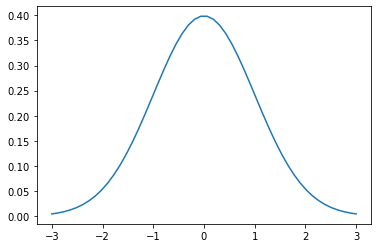

In [15]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, label='gray')

<img src='pictures/pmfvspdf.jpg' />

Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. 

However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called *kernel density estimation*, or **KDE**. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

## KDE plot

To generate a KDE plot, we'll use the *Seaborn* library for data visualization, which I import as *sns*. Seaborn provides *kdeplot*, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

<AxesSubplot:ylabel='Density'>

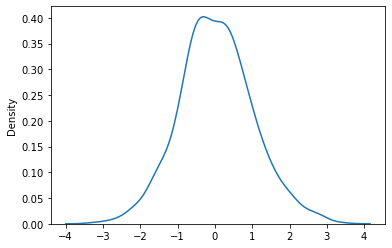

In [16]:
import seaborn as sns
sns.kdeplot(sample, label='kde')

### KDE and PDF

Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result:

<AxesSubplot:ylabel='Density'>

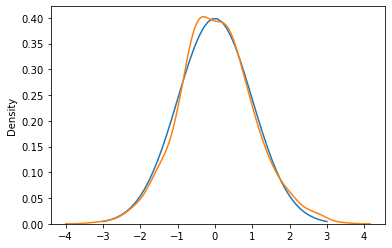

In [17]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, label='gray')
sns.kdeplot(sample, label='kde')

The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. 
It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

## PMF, CDF, KDE

* Use CDFs for exploration.
* Use PMFs if there are a small number of unique values.
* Use KDEs if there are a large number of unique values.

## Exercise

### Distribution of income

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's ``np.log10()`` function.

Then, you'll use the computed mean and standard deviation to make a norm object using the [``scipy.stats.norm()``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.

In [18]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standart deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


### Comparing CDFs

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of Log_income
Cdf(log_income).plot()

# Label the axes
plt.xlabel('Log10 of realinc')
plt.ylabel('CDF')
plt.show()

### Comparing PDFs

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace

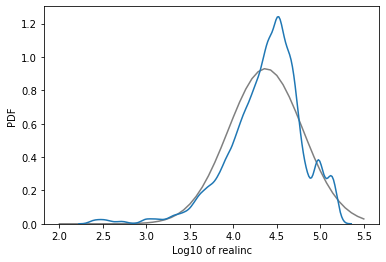

In [21]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income, label='kde')

# Label the axes
plt.xlabel('Log10 of realinc')
plt.ylabel('PDF')
plt.show()